In [1]:

import torch
import matplotlib.pyplot as plt
import time


In [2]:

images = torch.randn(32, 3, 64, 64)
images.shape


torch.Size([32, 3, 64, 64])

In [3]:

flattened = images.view(32, -1)
flattened.shape


torch.Size([32, 12288])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.6248739..3.6709874].


(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

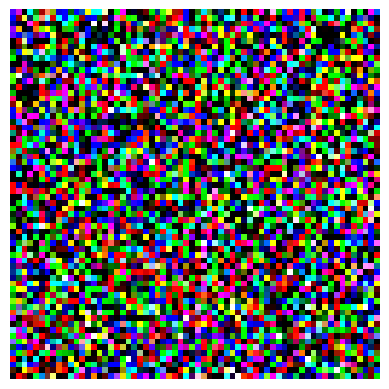

In [4]:

img = images[0].permute(1,2,0)
plt.imshow(img)
plt.axis('off')


In [5]:

x = torch.tensor(2.0, requires_grad=True)
y = x**3 + 5*x**2 + 2
y.backward()
x.grad


tensor(32.)

In [6]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cpu')

In [7]:

A = torch.randn(1000,1000)
B = torch.randn(1000,1000)

start = time.time()
C = A @ B
cpu_time = time.time() - start
cpu_time


0.05887174606323242

In [8]:

if torch.cuda.is_available():
    A_gpu = A.to(device)
    B_gpu = B.to(device)
    torch.cuda.synchronize()
    start = time.time()
    C_gpu = A_gpu @ B_gpu
    torch.cuda.synchronize()
    gpu_time = time.time() - start
    gpu_time
else:
    "GPU not available"
